In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()


170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
x_test.shape

(10000, 32, 32, 3)

In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_train[:10]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3]], dtype=uint8)

In [ ]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
y_test = y_test.reshape(-1,)


In [ ]:
classes = ['airplane', 'automobile', 'birds', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
def plot_sample(x, y, index):
  plt.figure(figsize=(15,2))
  plt.imshow(x[index])
  plt.xlabel(classes[y[index]])

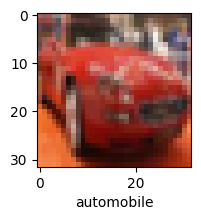

In [ ]:
plot_sample(x_train, y_train, 5)

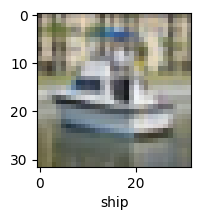

In [ ]:
plot_sample(x_train, y_train, 501)

In [ ]:
x_train = x_train/255.0
x_test = x_test/255.0

In [ ]:
ann = models.Sequential([
    layers.Flatten(input_shape = (32,32,3)),
    layers.Dense(3000, activation = 'relu'),
    layers.Dense(1000, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
])

ann.compile(optimizer = 'SGD',
            loss= 'sparse_categorical_crossentropy',
            metrics = ['accuracy'])

ann.fit(x_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 151s 96ms/step - loss: 1.8138 - accuracy: 0.3530
Epoch 2/5
1563/1563 [==============================] - 154s 99ms/step - loss: 1.6242 - accuracy: 0.4251
Epoch 3/5
1563/1563 [==============================] - 145s 93ms/step - loss: 1.5436 - accuracy: 0.4560
Epoch 4/5
1563/1563 [==============================] - 144s 92ms/step - loss: 1.4829 - accuracy: 0.4769
Epoch 5/5
1563/1563 [==============================] - 145s 93ms/step - loss: 1.4351 - accuracy: 0.4961


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = ann.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print('classification report: \n', classification_report(y_test, y_pred_classes))

313/313 [==============================] - 9s 29ms/step
classification report: 
               precision    recall  f1-score   support

           0       0.41      0.71      0.52      1000
           1       0.66      0.56      0.60      1000
           2       0.40      0.28      0.33      1000
           3       0.30      0.36      0.33      1000
           4       0.55      0.27      0.36      1000
           5       0.31      0.50      0.39      1000
           6       0.51      0.57      0.54      1000
           7       0.60      0.46      0.52      1000
           8       0.71      0.40      0.51      1000
           9       0.56      0.56      0.56      1000

    accuracy                           0.47     10000
   macro avg       0.50      0.47      0.47     10000
weighted avg       0.50      0.47      0.47     10000



In [ ]:
import seaborn as sns

<function matplotlib.pyplot.show(close=None, block=None)>

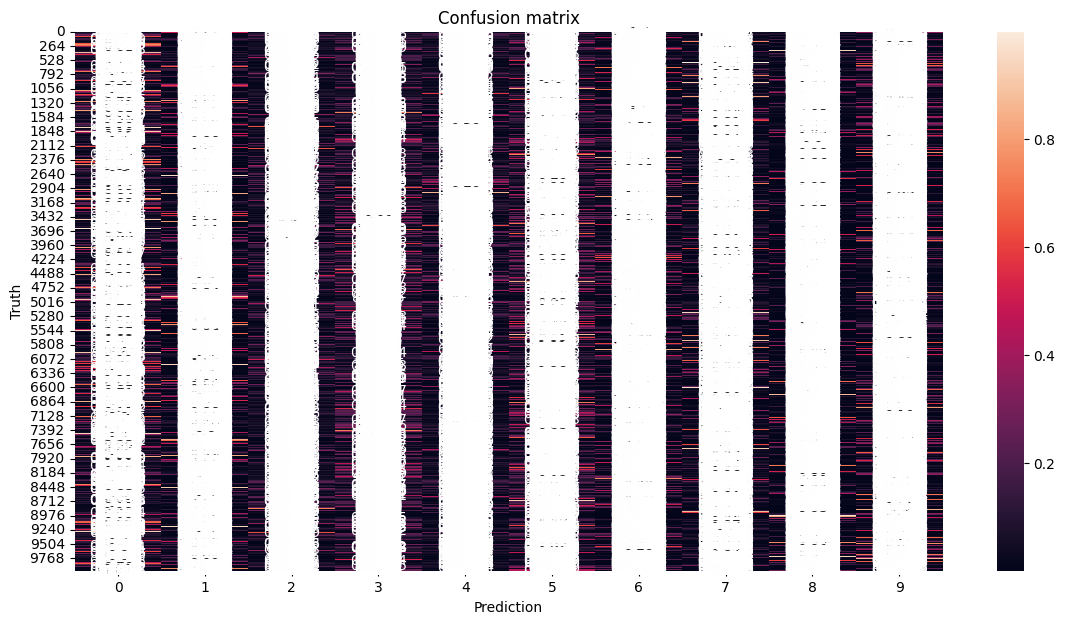

In [ ]:
plt.figure(figsize =(14,7))
sns.heatmap(y_pred, annot = True)
plt.ylabel('Truth')
plt.xlabel('Prediction')
plt.title('Confusion matrix')
plt.show

In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [ ]:
cnn.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 92s 56ms/step - loss: 1.4177 - accuracy: 0.4892
Epoch 2/10
1563/1563 [==============================] - 62s 40ms/step - loss: 1.0752 - accuracy: 0.6236
Epoch 3/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.9431 - accuracy: 0.6719
Epoch 4/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.8516 - accuracy: 0.7045
Epoch 5/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.7805 - accuracy: 0.7295
Epoch 6/10
1563/1563 [==============================] - 62s 39ms/step - loss: 0.7165 - accuracy: 0.7513
Epoch 7/10
1563/1563 [==============================] - 60s 38ms/step - loss: 0.6697 - accuracy: 0.7661
Epoch 8/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.6201 - accuracy: 0.7832
Epoch 9/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.5734 - accuracy: 0.7998
Epoch 10/10
1563/1563 [==============================] - 60s 38m

In [ ]:
cnn.evaluate(x_test, y_test)

313/313 [==============================] - 4s 12ms/step - loss: 0.9148 - accuracy: 0.7113


[0.9147903323173523, 0.7113000154495239]

In [ ]:
y_pred = cnn.predict(x_test)
y_pred[:5]

313/313 [==============================] - 8s 24ms/step


array([[2.4911438e-04, 5.6858393e-05, 2.1584460e-03, 9.4373894e-01,
        4.4291397e-04, 4.1092895e-02, 3.8520870e-04, 8.2965463e-04,
        4.2618266e-03, 6.7839837e-03],
       [2.4135326e-04, 7.8312345e-02, 3.1004572e-09, 6.6698926e-09,
        3.1789031e-12, 1.4020851e-10, 4.3030707e-10, 1.0840515e-09,
        9.1933912e-01, 2.1071462e-03],
       [4.7325652e-02, 4.1582292e-01, 1.3486355e-03, 1.7230767e-03,
        7.1454758e-04, 6.9014583e-04, 1.5209832e-04, 2.6347286e-03,
        5.0097716e-01, 2.8611038e-02],
       [3.5388297e-01, 5.1718014e-03, 4.5021751e-04, 1.6504582e-05,
        2.4817887e-04, 9.8011457e-09, 2.3955204e-06, 1.6862840e-06,
        6.3982588e-01, 4.0026373e-04],
       [2.2657107e-07, 3.6813190e-06, 5.2676969e-03, 9.3558550e-02,
        4.5804557e-01, 9.3587762e-04, 4.4217768e-01, 4.6918126e-06,
        5.4574266e-06, 5.2005078e-07]], dtype=float32)

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 8, 4]

In [ ]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

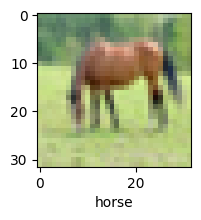

In [ ]:
plot_sample(x_test, y_test, 60)

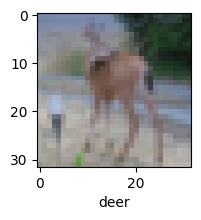

In [ ]:
plot_sample(x_test, y_test, 100)

In [ ]:
classes[y_classes[60]]

'horse'